Termo II: Práctica 1
Bomba Centrífuga
Nombres: Vanessa Ferreira, Andrea Daza

In [19]:
#Importar librerías
# Datos y Gráficas
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

# OLS
import numpy as np
import scipy
import sklearn

1. Datos recolectados en laboratorio

In [43]:
#Caudal en 5 puntos
p_1 = [0.90, 0.87, 0.88]
p_2 = [2.97, 3, 2.99]
p_3 = [4.19, 4.17, 4.18]
p_4 = [5.11, 5.12, 5.09]
p_5 = [5.55, 5.51, 5.56]

#Promedio de datos para cada punto
pp_1 = sum(p_1)/len(p_1)
pp_2 = sum(p_2)/len(p_2)
pp_3 = sum(p_3)/len(p_3)
pp_4 = sum(p_4)/len(p_4)
pp_5 = sum(p_5)/len(p_5)

Q = [pp_1, pp_2, pp_3, pp_4, pp_5]
Q

#Presión de salida 
#Nota: las presiones se dan en PSI, se pasan a Pa multiplicando por 6894.76
P_1 = 31.8*6894.76
P_2 = 29.8*6894.76
P_3 = 27.4*6894.76
P_4 = 25*6894.76
P_5 = 24*6894.76

#Presión de entrada
PE = 0.5*6894.76

2. Cálculo de cabeza dada por la ecuación:
H = (P2-P1)/ρ*g + V2^2-V1^2/2*g + z2-z1

Donde las alturas del fluido son despreciables

Asimismo, las velocidades no varían

Por lo cual, la cabeza para los distintos puntos se calcula únicamente para el primer término de la ecuación. 

In [44]:
H = []
densidad = 1
g = 9.81
for i in Q:
    rta = ((PE-i)/densidad*g)
    H.append(rta)
H

[33810.132300000005,
 33789.498600000006,
 33777.792,
 33768.701400000005,
 33764.4504]

3. Contando ya con el caudal y la cabeza, haremos un dataframe

In [45]:
df = pd.DataFrame({'Caudal': Q,
                   'Altura': H})
df

,Caudal,Altura
0,0.883333,33810.1323
1,2.986667,33789.4986
2,4.180000,33777.7920
3,5.106667,33768.7014
4,5.540000,33764.4504


4. Interpolación lineal

In [46]:
itp_lineal = scipy.interpolate.interp1d(df['Caudal'], df['Altura'])
itp_lineal

In [47]:
H_inter = itp_lineal(df['Caudal'])
H_inter


array([33810.1323, 33789.4986, 33777.792 , 33768.7014, 33764.4504])

5. Gráfica 1. Caudal vs Cabeza

Text(0.5, 0, 'Caudal (m^3/h)')

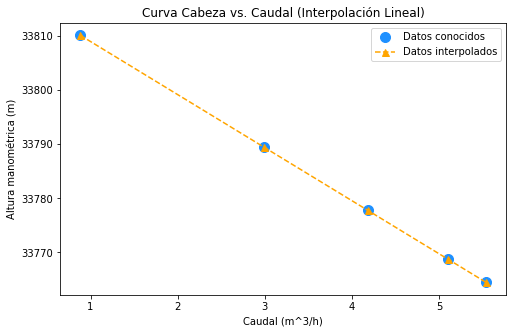

In [49]:
hor = 8
ver = 5
plt.figure(figsize=(hor, ver))

plt.plot(df['Caudal'], df['Altura'], linestyle='', marker='o', color='dodgerblue', ms=10, label='Datos conocidos')
plt.plot(df['Caudal'], H_inter, linestyle='--', marker='^', color='orange', ms=7, label='Datos interpolados')
plt.legend()

plt.title('Curva Cabeza vs. Caudal (Interpolación Lineal)')
plt.ylabel('Altura manométrica (m)')
plt.xlabel('Caudal (m^3/h)')



6. Cálculo potencia potencia hidráulica

In [50]:

def calcular_p_hid(row):
    Q = row['Caudal']
    H = row['Altura']
    return densidad * g * Q * H

# Aplicar la función a las filas del DataFrame y almacenar el resultado en una nueva columna
df['Potencia hidráulica'] = df.apply(calcular_p_hid, axis=1)
df

,Caudal,Altura,Potencia hidráulica
0,0.883333,33810.1323,2.929817e+05
1,2.986667,33789.4986,9.900053e+05
2,4.180000,33777.7920,1.385085e+06
3,5.106667,33768.7014,1.691690e+06
4,5.540000,33764.4504,1.835010e+06


7. Cálculo eficiencia de la bomba
n = Potencia hidraúlica/ Potencia eléctrica

In [51]:
#Potencia eléctrica (P=V*I)
V = ['Ingresar datos']
I = ['Ingresar datos']

df_1 = pd.DataFrame({'Voltaje': V,
                   'Corriente': I})

def calcular_p_elec(fila):
    V = fila['Voltaje']
    I = fila['Corriente']
    return V*I

# Aplicar la función a las filas del DataFrame y almacenar el resultado en una nueva columna
df_1['Potencia eléctrica'] = df_1.apply(calcular_p_elec, axis = 1)

df['Potencia eléctrica_1'] = df_1['Potencia eléctrica']

def calcular_ef(fila_1):
    P_hid = fila_1['Potencia hidráulica'] 
    P_elec = fila_1['Potencia eléctrica_1']

    efi = P_hid/P_elec
    return efi

# Aplicar la función a las filas del DataFrame y almacenar el resultado en una nueva columna
df['Eficiencia bomba'] = df.apply(calcular_ef, axis = 1)
df

TypeError: can't multiply sequence by non-int of type 'str'

8. POTENCIA:
Potencia real y potencia aparente

In [ ]:
#Factor de potencia
f_potencia = 0.74 #equivale a cos(theta)
p_aparente = 10 #CAMBIAR VALOR

p_activa = f_potencia*p_aparente
p_reactiva = np.sqrt(p_aparente**2-p_activa**2)

#Cómo se calcula la potencia real????

Preguntas:
1. Cómo se toman los valores de la curva del fabricante para hacer la comparación?
2. Cómo se interpretan los datos del dispositivo para voltaje y corriente
3. Cómo se interpretan las imágenes de gráfica Potencia y Energía
4. En las gráficas, cuando se habla de eficiencia, se refiere a la de la bomba si?
5. Cómo se calcula la potencia real?
6. De las imágenes que se tomaron, cual es la potencia aparente? 
7. Los valores de la potencia real, aparente y activa son únicos para cada punto? o para todo el sistema?